# Final project

#### In the following document, we will analyze sales trends between NA and EU by platform type.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Import the dataset
file_path = 'game.csv'
game = pd.read_csv(file_path, delimiter=';')

print(game.head())

   Rank Platform  Year     Genre Publisher  NA_Sales  EU_Sales  Other_Sales  \
0     1      Wii  2006    Sports  Nintendo     41.49     29.02         8.46   
1     3      Wii  2008    Racing  Nintendo     15.85     12.88         3.31   
2     4      Wii  2009    Sports  Nintendo     15.75     11.01         2.96   
3     7       DS  2006  Platform  Nintendo     11.38      9.23         2.90   
4     8      Wii  2006      Misc  Nintendo     14.03      9.20         2.85   

   Global_Sales  
0         82.74  
1         35.82  
2         33.00  
3         30.01  
4         29.02  


#### First we are going to generate a plot that analyses sales trends across different gaming platforms in North America and Europe. 
#### To do so, we group the data by platform, sum up the sales in both regions and then visualize the results using a bar plot.

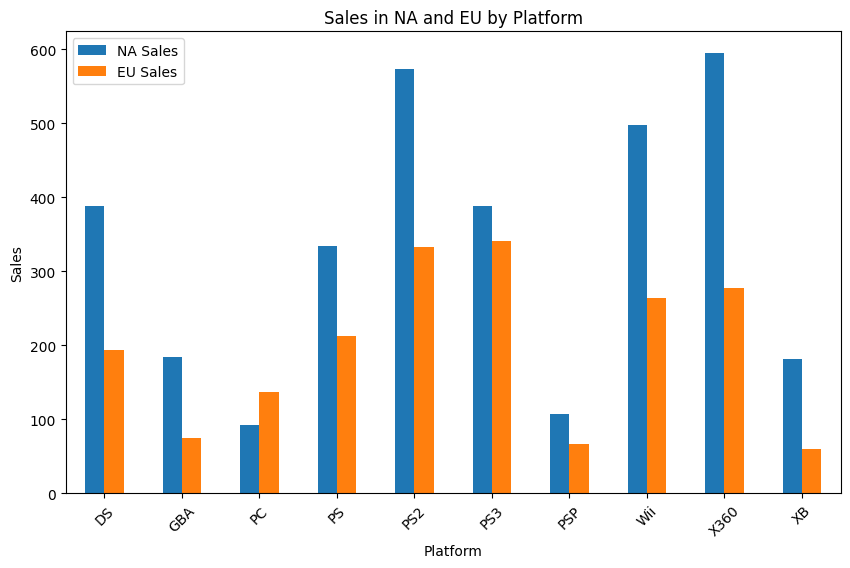

In [3]:
# Group by platform and sum NA and EU sales
sales_by_platform = game.groupby('Platform')[['NA_Sales', 'EU_Sales']].sum()

# Plot
sales_by_platform.plot(kind='bar', figsize=(10, 6))
plt.title('Sales in NA and EU by Platform')
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotate x axis labels
plt.legend(['NA Sales', 'EU Sales'])
plt.show()

#### The previous graph reveals a big difference between North America (NA) and Europe (EU). 
#### NA tends to favor Xbox 360 (594.33M) and PS2 (572.92M), while EU shows stronger support for PS3 (340.47M). Overall, NA has higher total sales in all the platforms compared to EU, indicating a potentially larger gaming market. This could reflect cultural differences or marketing strategies influencing consumer preferences.

#### Now we are going to analyze the trend of North American (NA) sales for different gaming platforms over the years and the trend of European (EU) sales for different gaming platforms over the years. we are going to generate 2 graphs, they groups the data by platform and year, calculates the sum of NA sales and EU sales for each platform in each year, and visualizes the results using a line plot. These plots illustrate how NA and EU sales have evolved over time for each platform, offering insights into the popularity and longevity of gaming platforms in the NA market.

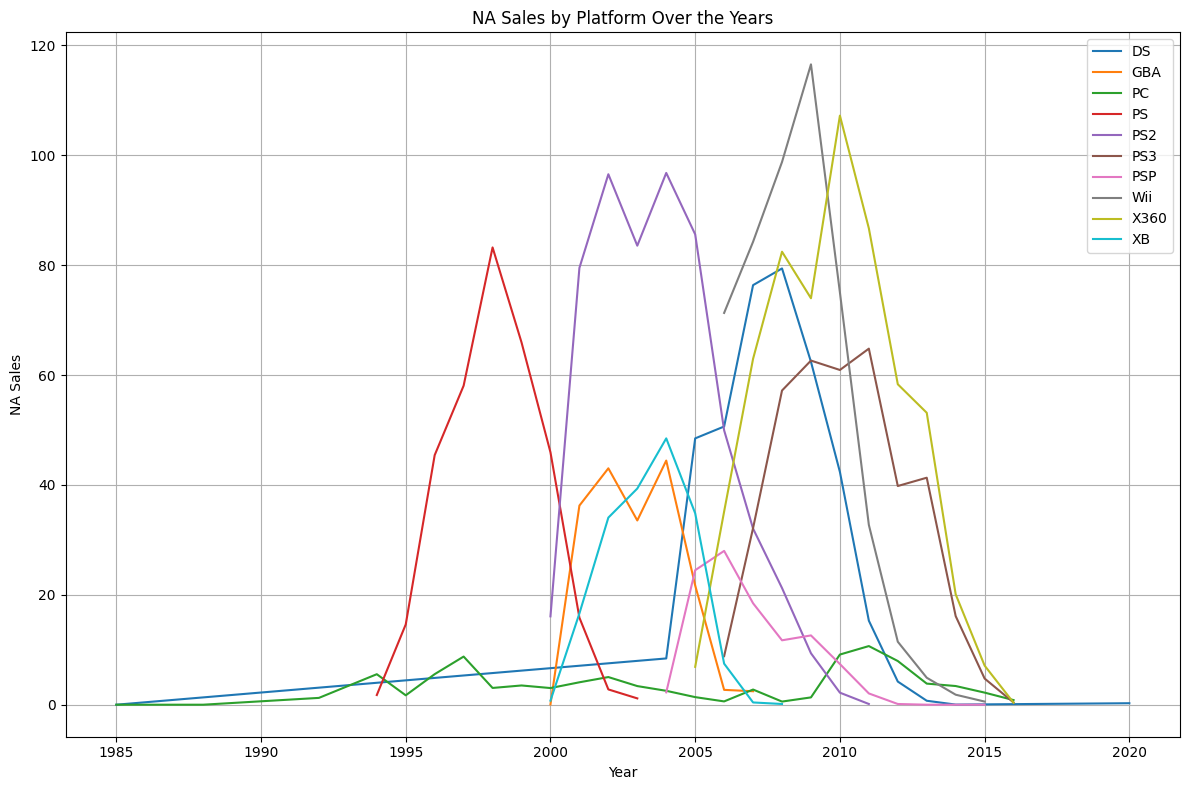

In [8]:
# Group the data by platform and year, and calculate the sum of NA sales
platform_year_sales = game.groupby(['Platform', 'Year'])['NA_Sales'].sum().reset_index()

# Create a line plot for each platform
plt.figure(figsize=(12, 8))
for platform in platform_year_sales['Platform'].unique():
    platform_data = platform_year_sales[platform_year_sales['Platform'] == platform]
    plt.plot(platform_data['Year'], platform_data['NA_Sales'], label=platform)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('NA Sales')
plt.title('NA Sales by Platform Over the Years')
plt.legend()
plt.grid(True)  # Add grid lines
plt.tight_layout()
plt.show()

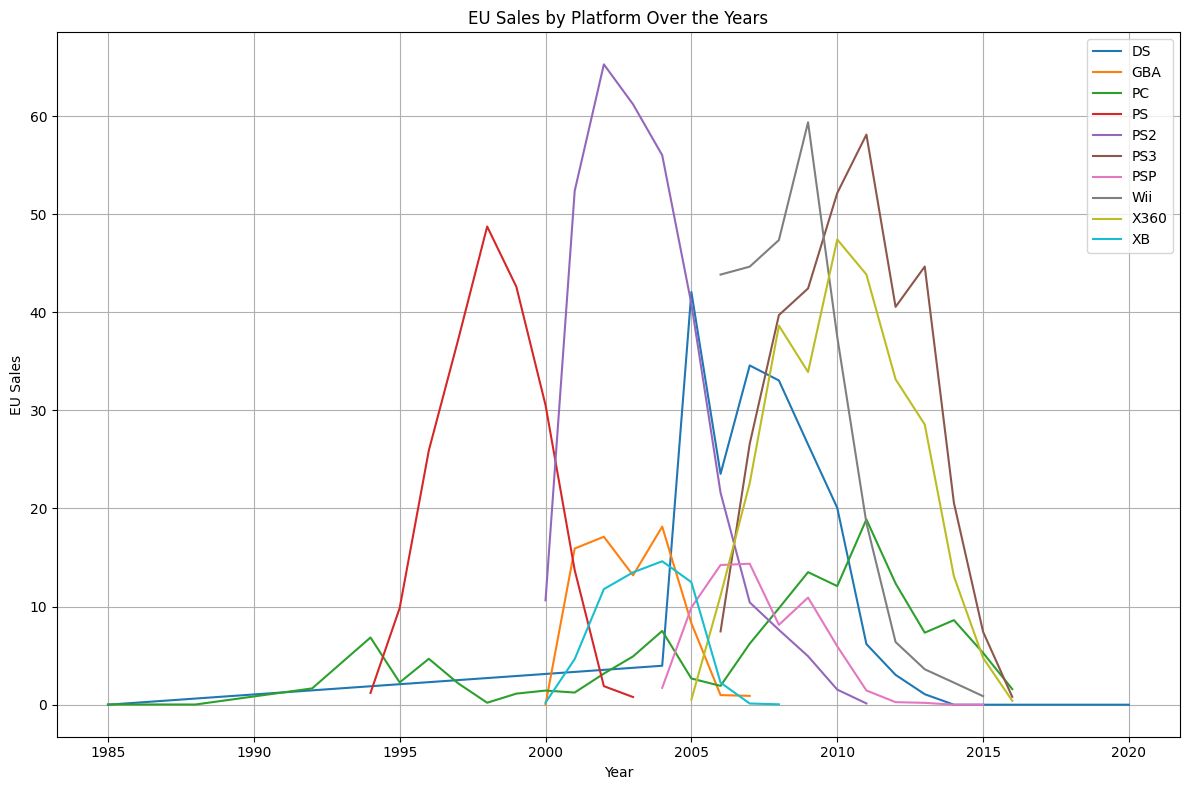

In [5]:
# Group the data by platform and year, and calculate the sum of EU sales
platform_year_sales = game.groupby(['Platform', 'Year'])['EU_Sales'].sum().reset_index()

# Create a line plot for each platform
plt.figure(figsize=(12, 8))
for platform in platform_year_sales['Platform'].unique():
    platform_data = platform_year_sales[platform_year_sales['Platform'] == platform]
    plt.plot(platform_data['Year'], platform_data['EU_Sales'], label=platform)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('EU Sales')
plt.title('EU Sales by Platform Over the Years')
plt.legend()
plt.grid(True)  # Add grid lines
plt.tight_layout()
plt.show()

#### As we can see in the two previous graphs, there's a common trend. Generally, all platforms grow rapidly upon launch and reach their peak in a few years in both regions before declining. This trend contrasts with what happens with the PC platform, which remains more or less stable throughout the entire graph. Every time a new platform is released, the games for PC sales drop slightly, but after a few years, they rise again. To see this trend more clearly, we will create four graphs comparing these trends.

#### The four graphs examine how global sales trends for certain gaming platforms compare to PC sales over time. Each graph filters data for platforms of interest, groups it by platform and year, and calculates total global sales. They depict PC sales alongside sales for specific platforms: PS, PS2, PS3; X360, XB; Wii; and PSP, DS, GBA. These comparisons reveal how global sales for each platform evolve over the years relative to PC sales, offering insights into their popularity and market performance.

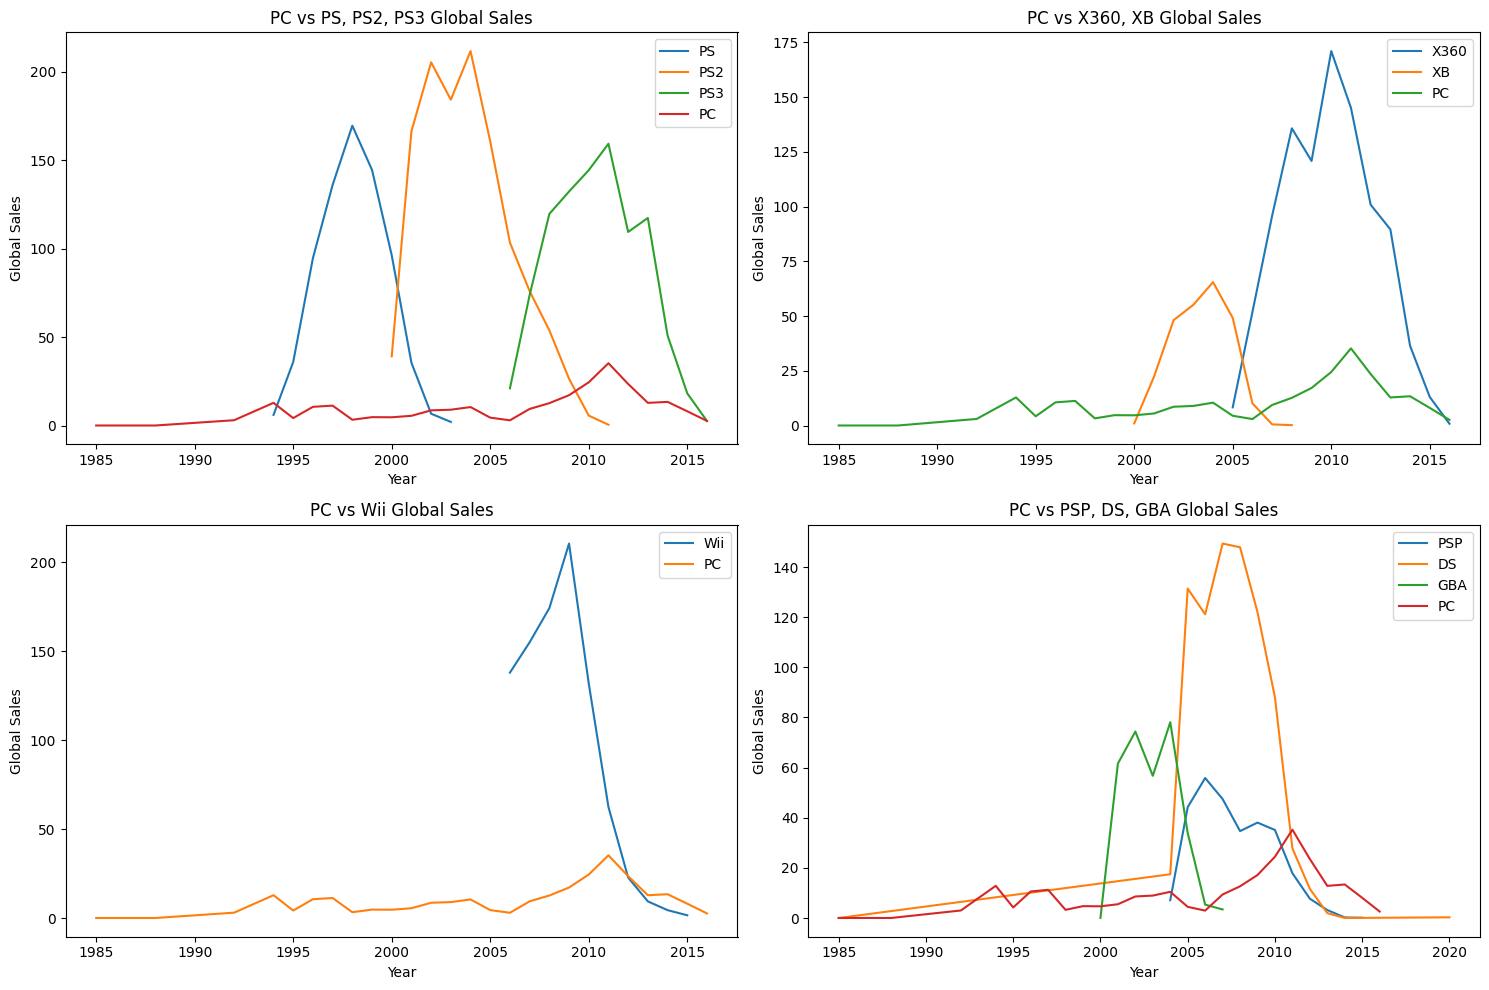

In [13]:
# Filter data for the platforms of interest
platforms_of_interest = ['PC', 'PS', 'PS2', 'PS3', 'X360', 'XB', 'Wii', 'PSP', 'DS', 'GBA']
filtered_data = game[game['Platform'].isin(platforms_of_interest)]

# Group the filtered data by platform and year, and calculate the sum of global sales
platform_year_sales = filtered_data.groupby(['Platform', 'Year'])['Global_Sales'].sum().reset_index()

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot for PC vs PS, PS2, PS3 in Global Sales
ps_platforms = ['PS', 'PS2', 'PS3']
for platform in ps_platforms:
    platform_data = platform_year_sales[platform_year_sales['Platform'] == platform]
    axs[0, 0].plot(platform_data['Year'], platform_data['Global_Sales'], label=platform)
axs[0, 0].plot(platform_year_sales[platform_year_sales['Platform'] == 'PC']['Year'], 
               platform_year_sales[platform_year_sales['Platform'] == 'PC']['Global_Sales'], label='PC')
axs[0, 0].set_title('PC vs PS, PS2, PS3 Global Sales')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Global Sales')
axs[0, 0].legend()

# Plot for PC vs X360, XB in Global Sales
xbox_platforms = ['X360', 'XB']
for platform in xbox_platforms:
    platform_data = platform_year_sales[platform_year_sales['Platform'] == platform]
    axs[0, 1].plot(platform_data['Year'], platform_data['Global_Sales'], label=platform)
axs[0, 1].plot(platform_year_sales[platform_year_sales['Platform'] == 'PC']['Year'], 
               platform_year_sales[platform_year_sales['Platform'] == 'PC']['Global_Sales'], label='PC')
axs[0, 1].set_title('PC vs X360, XB Global Sales')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Global Sales')
axs[0, 1].legend()

# Plot for PC vs Wii in Global Sales
platform_data = platform_year_sales[platform_year_sales['Platform'] == 'Wii']
axs[1, 0].plot(platform_data['Year'], platform_data['Global_Sales'], label='Wii')
axs[1, 0].plot(platform_year_sales[platform_year_sales['Platform'] == 'PC']['Year'], 
               platform_year_sales[platform_year_sales['Platform'] == 'PC']['Global_Sales'], label='PC')
axs[1, 0].set_title('PC vs Wii Global Sales')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Global Sales')
axs[1, 0].legend()

# Plot for PC vs PSP, DS, GBA in Global Sales
handheld_platforms = ['PSP', 'DS', 'GBA']
for platform in handheld_platforms:
    platform_data = platform_year_sales[platform_year_sales['Platform'] == platform]
    axs[1, 1].plot(platform_data['Year'], platform_data['Global_Sales'], label=platform)
axs[1, 1].plot(platform_year_sales[platform_year_sales['Platform'] == 'PC']['Year'], 
               platform_year_sales[platform_year_sales['Platform'] == 'PC']['Global_Sales'], label='PC')
axs[1, 1].set_title('PC vs PSP, DS, GBA Global Sales')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Global Sales')
axs[1, 1].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()